# Importing the packages

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

# Data Preparation

In [9]:
df1 = pd.read_csv('supermarket_binarymat.csv')

In [10]:
df1.head()

,transID,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df1.dtypes

transID             int64
abrasive cleaner    int64
artif. sweetener    int64
baby cosmetics      int64
baby food           int64
                    ...  
white bread         int64
white wine          int64
whole milk          int64
yogurt              int64
zwieback            int64
Length: 170, dtype: object

## Removing transaction id.

In [16]:
df1 = df1.drop('transID', axis=1)

# EDA

In [20]:
s = df1.sum(axis=0)
Top = s.sort_values(ascending=False)[:25]

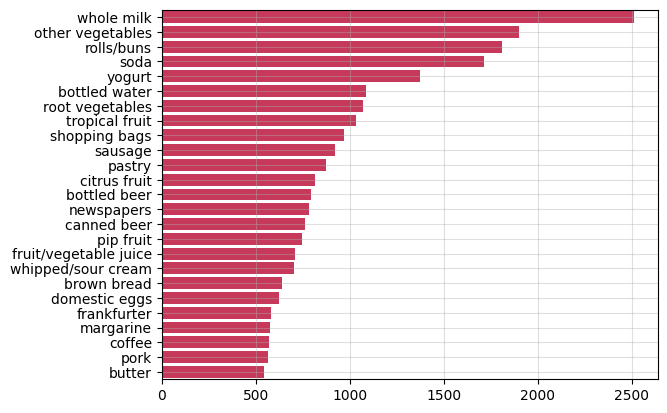

In [33]:
sns.barplot(x=Top.values, y=Top.index, color='#de214f')
plt.grid(alpha=0.4)

In [34]:
TopD = Top/sum(s)

<Axes: >

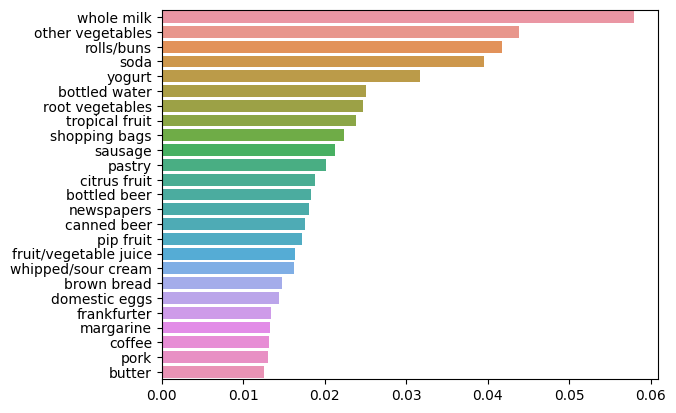

In [35]:
sns.barplot(x=TopD.values, y=TopD.index)

## Changing the data types to boolean.

In [37]:
df2 = df1.copy(deep=True)

In [38]:
df2 = df2.astype(bool)

In [39]:
df2.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Building Association Rules

In [59]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)

In [61]:
frequent_itemsets

,support,itemsets
0,0.017692,(baking powder)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
328,0.011998,"(tropical fruit, whole milk, root vegetables)"
329,0.014540,"(whole milk, root vegetables, yogurt)"
330,0.010473,"(whole milk, soda, yogurt)"
331,0.015150,"(tropical fruit, whole milk, yogurt)"


In [45]:
rules = association_rules(frequent_itemsets, min_threshold=1.5)

In [98]:
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
95,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030,0.490649,1,1,2
306,"(whole milk, sausage)",(other vegetables),0.029893,0.193493,0.010168,0.340136,1.757876,0.004384,1.222233,0.444417,2,1,3
220,(butter),"(whole milk, other vegetables)",0.055414,0.074835,0.011490,0.207339,2.770630,0.007343,1.167164,0.676562,1,2,3
106,(frozen vegetables),(root vegetables),0.048094,0.108998,0.011591,0.241015,2.211176,0.006349,1.173938,0.575426,1,1,2
155,(other vegetables),(sugar),0.193493,0.033859,0.010778,0.055702,1.645119,0.004226,1.023131,0.486221,1,1,2


In [62]:
rules = association_rules(frequent_itemsets, metric='lift',min_threshold=1.5)

In [63]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,0.601792
2,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,0.753189
3,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
4,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487,0.495856
...,...,...,...,...,...,...,...,...,...,...
377,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,0.668309
378,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711
379,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807,0.688864
380,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881,0.679582


# Subsetting Rules Based on Criteria
We can zero in on rules that meet user-specified criteria, such as ___lift___, ___confidence___ or ___support___.

In [66]:
filter = ((rules['lift']>=2) & (rules['confidence'] >= 0.55))

In [67]:
rules[filter]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
218,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
222,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
242,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
248,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
288,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
357,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627
364,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625


## Sorting Rules

In [69]:
rules = rules.sort_values(by=['lift'], ascending=False)

In [70]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
241,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,0.745217
244,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,0.743056
223,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,0.717225
226,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720
332,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206,0.725409


In [73]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))
rules['maxlen'] = rules['antecedent_len']+rules['consequent_len']

In [81]:
filter = (rules['consequent_len'] > 1)

In [82]:
rules[filter]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
244,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,0.743056,1,2,3
226,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720,1,2,3
333,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697,0.747497,1,2,3
292,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776,0.765445,1,2,3
227,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941,0.830649,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,(other vegetables),"(pastry, whole milk)",0.193493,0.033249,0.010574,0.054651,1.643695,0.004141,1.022639,0.485568,1,2,3
283,(other vegetables),"(whole milk, rolls/buns)",0.193493,0.056634,0.017895,0.092486,1.633026,0.006937,1.039505,0.480640,1,2,3
215,(other vegetables),"(whole milk, bottled water)",0.193493,0.034367,0.010778,0.055702,1.620783,0.004128,1.022593,0.474905,1,2,3
261,(pastry),"(whole milk, other vegetables)",0.088968,0.074835,0.010574,0.118857,1.588261,0.003917,1.049961,0.406550,1,2,3


## Targeting antecedents and consequents.

In [99]:
filters = (rules['consequents']=={'rolls/buns', 'whole milk'}) & (rules['antecedents']=={'citrus fruit', 'root vegetables', 'butter', 'yogurt'})

In [100]:
rules[filters]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen


# Visualizing Rules

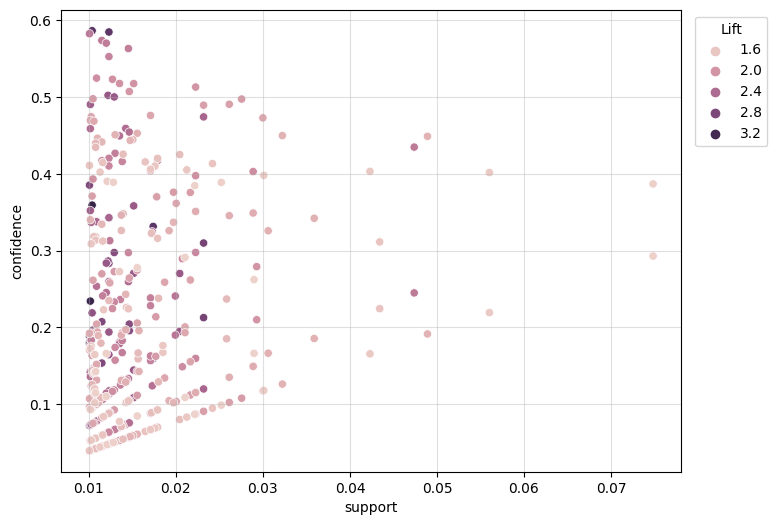

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.legend(bbox_to_anchor = (1.15, 1), title='Lift')
plt.grid(alpha=0.4)